# Data201 Group Project Code

# Comparision of 40 Countries (grouped by their HDI index) to social and economic factors

Data sourced from http://hdr.undp.org/en/data and https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/index.aspx

Please ensure relevant csv files are saved in the working directory.
(Female_Employment, Male_Employment, Unemployment_Total, Income_Index, Income_Inequality, Homicide_Rate, Suicide_Rate_Female, Suicide_Rate_Male, HDI)

In [55]:
# Install tidyverse, rvest and reshape
library(tidyverse)
install.packages("rvest")
library(rvest)
library(reshape2)
# load ggplot2
library(ggplot2)

Warning message:
"package 'rvest' is in use and will not be installed"

# Economic Factors 

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/103606

In [56]:
# Read in information from CSV files
income_index <- read_csv("Income_Index.csv") 
# glimpse(income_index)

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)
See spec(...) for full column specifications.


Each column was automatically parsed in as a 'character' type. As there are many columns, it's easier to transform it to a long dataset first, so there are less columns to change to numeric values, and this is easier than specifing what type the columns should be parsed in as.

To filter out 4 groups of countries to compare (from most developed to less developed) we chose 10 that were the most developed, 10 the least developed and 10 from the 66% percentile and 10 from 33% percentile, using HDI index.

In [57]:
# Create vectors for the HDI indexes used in each group
highest <- c(1:10) # Most developed countries (1-10)
high <- c(54:63) # 66 Percentile (53-63)
low <- c(117:126) # 33 Percentile (116-126)
lowest <-c(180:189) # Least developted countries (179-189)

# Create function to convert to long format (easier for graphing)
convert_to_long <- function(data) {
    gather(data, Year, Factor, -HDI, -Country) %>%
    # Transform variables to numeric type for graphing
    transform(Year = as.numeric(Year), Factor = as.numeric(Factor), check.names=FALSE) %>%
    na.omit() # Omit NA's
}

Sort the income_index dataset by HDI rank, convert to long dataframe

In [58]:
income_index <- income_index %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() #Omit missing values

# Create dataframe for each set of HDI indexes
income_index_highest <- subset(income_index, HDI %in% highest)
income_index_highest$HDI <- '1'

income_index_high <- subset(income_index, HDI %in% high)
income_index_high$HDI <- '2'

income_index_low <- subset(income_index, HDI %in% low)
income_index_low$HDI <- '3'

income_index_lowest <- subset(income_index, HDI %in% lowest)
income_index_lowest$HDI <- '4'

# Bind data into new dataframe
income_index2 <- rbind(income_index_highest, income_index_high, income_index_low, income_index_lowest) 

# Convert to long dataframe
income_index2 <- convert_to_long(income_index2) %>% rename(Income_Index = Factor)

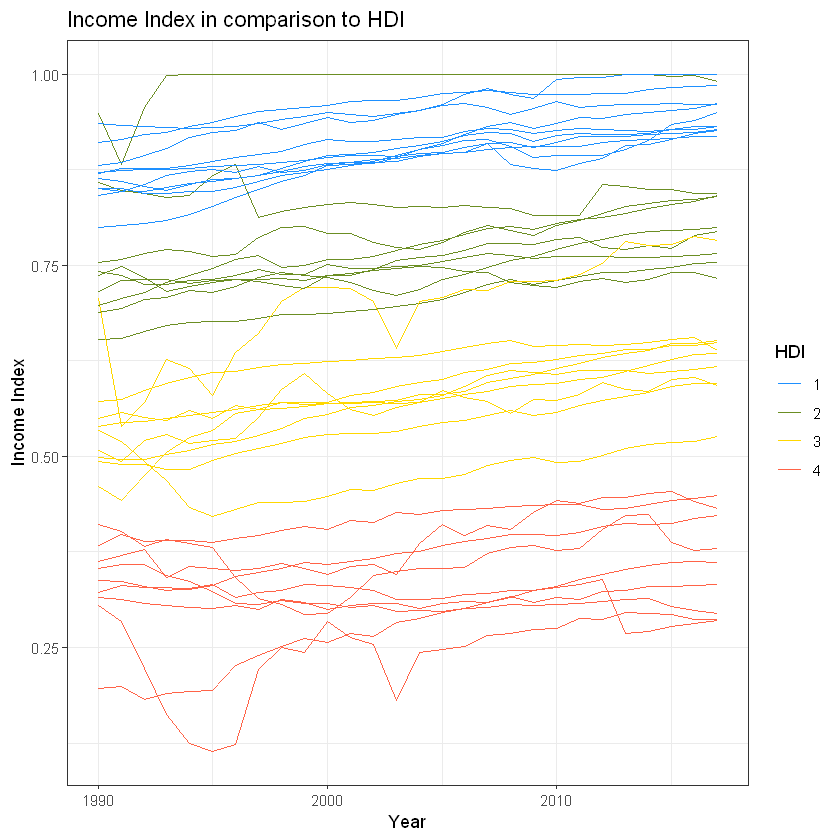

In [59]:
ggplot() +
    # Plot the income index in comparison to HDI
    geom_line(data = income_index2, aes(x=Year, y=Income_Index, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pic colors and theme
    ggtitle('Income Index in comparison to HDI') + xlab('Year') + ylab('Income Index') # Labels

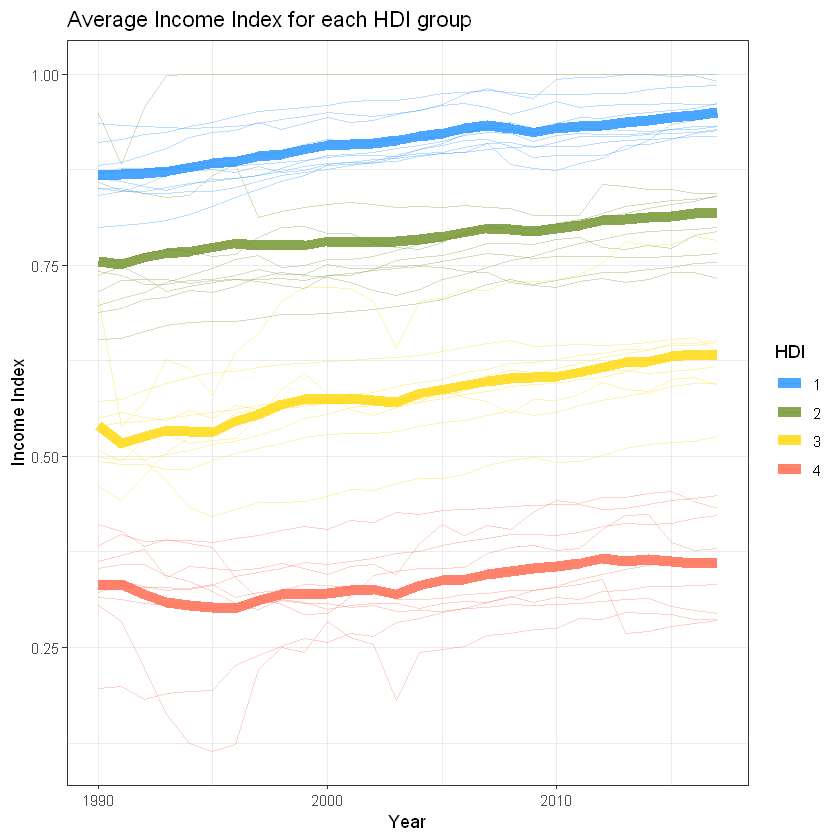

In [60]:
# Group the long dataframe by HDI and Year so we can find the average Income Index for each group
income_index_grouped <- income_index2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Income_Index = mean(Income_Index)) # Find average of Income Index

# Plot the Average Income Index for each HDI group
ggplot(income_index2, aes(x = Year, y = Income_Index, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = income_index_grouped, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Average Income Index for each HDI group') + 
    xlab('Year') + ylab('Income Index') # Labels

Read in the information from the CSV file Unemployment.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/140606

In [61]:
# Read in data from CSV file
unemployment <- read_csv("Unemployment_Total.csv")
# glimpse(unemployment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1991` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


In [62]:
# Sort by HDI, omit NA's
unemployment <- unemployment %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() 

# Create dataframe for eachs set of HDI indexes
unemployment_highest <- subset(unemployment, HDI %in% highest)
unemployment_highest$HDI <- '1'

unemployment_high <- subset(unemployment, HDI %in% high)
unemployment_high$HDI <- '2'

unemployment_low <- subset(unemployment, HDI %in% low)
unemployment_low$HDI <- '3'

unemployment_lowest <- subset(unemployment, HDI %in% lowest)
unemployment_lowest$HDI <- '4'

# Bind data into new dataframe
unemployment2 <- rbind(unemployment_highest, unemployment_high, unemployment_low, unemployment_lowest) 

# Conver to long dataframe
unemployment2 <- convert_to_long(unemployment2) %>% rename(Unemployment_Rate = Factor)

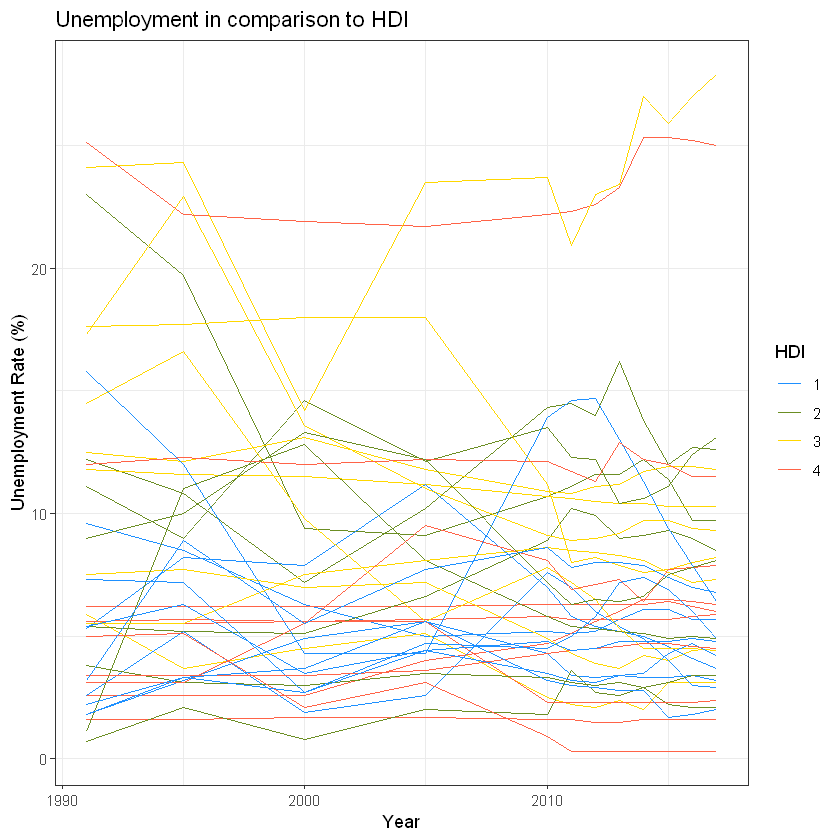

In [63]:
# Plot the unemployment in comparison to HDI
ggplot() +
    geom_line(data = unemployment2, aes(x=Year, y=Unemployment_Rate, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors/theme
    ggtitle('Unemployment in comparison to HDI') + xlab('Year') + ylab('Unemployment Rate (%)') # Labels

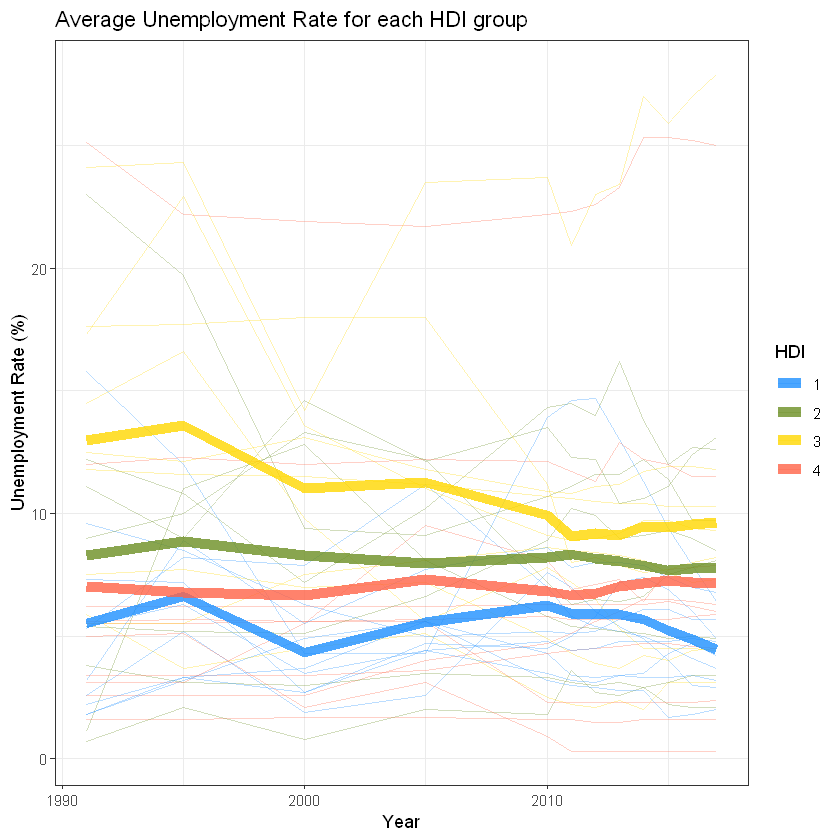

In [64]:
# Group the long dataframe by HDI and Year so we can find the average Unemployment rate for each group
unemploymentgrouped <- unemployment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Unemployment_Rate = mean(Unemployment_Rate)) # Find average unemployment rate

# Plot the Average Income Index for each HDI group
ggplot(unemployment2, aes(x = Year, y = Unemployment_Rate, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = unemploymentgrouped, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colours
    theme_bw() + ggtitle('Average Unemployment Rate for each HDI group') + 
    xlab('Year') + ylab('Unemployment Rate (%)') # Labels

Scrape Data from IMF (WEO) Website for predicted unemployment rates

Source: https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/index.aspx

Our 40 Countries: https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weorept.aspx?sy=2017&ey=2024&scsm=1&ssd=1&sort=country&ds=.&br=1&pr1.x=26&pr1.y=7&c=668%2C548%2C193%2C678%2C313%2C316%2C686%2C218%2C688%2C138%2C748%2C618%2C278%2C624%2C692%2C142%2C626%2C628%2C565%2C238%2C253%2C718%2C724%2C576%2C733%2C134%2C144%2C336%2C146%2C532%2C176%2C429%2C433%2C178%2C916%2C298%2C443%2C917&s=LUR&grp=0&a=

In [65]:
# Get the url of the page and read it into R
url_page <- "https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weorept.aspx?sy=2017&ey=2024&scsm=1&ssd=1&sort=country&ds=.&br=1&pr1.x=55&pr1.y=7&c=668%2C548%2C193%2C678%2C313%2C316%2C686%2C218%2C688%2C138%2C748%2C618%2C624%2C692%2C142%2C626%2C628%2C565%2C238%2C253%2C643%2C718%2C724%2C576%2C733%2C134%2C336%2C146%2C532%2C176%2C429%2C433%2C178%2C916%2C298%2C443%2C917&s=LUR&grp=0&a="
read_url <- read_html(url_page)

In [66]:
# Observe the actual html structure of the webpage in R
# read_url %>% html_structure()

In [67]:
# Get the tables from webpage into R and select the table number 5
tables <- read_url %>%
html_nodes("table")
unemployment_df <- as.data.frame(tables[5] %>% html_table(fill = TRUE))

In [68]:
# Delete the first two rows unused 
updated_unemployment_df <- unemployment_df[-c(1, 2),]

# Delete the unused column 
updated_unemployment_df$'X14' <- NULL
updated_unemployment_df$'X4' <- NULL
updated_unemployment_df$'X5' <- NULL

# Rename columns
updated_unemployment_df <- rename(updated_unemployment_df, "Country" = "X1", "Subject Descriptor" = "X2", "Units" = "X3", 
       "2017" = "X6", "2018" = "X7", "2019" = "X8", "2020" = "X9",
      "2021" = "X10", "2022" = "X11", "2023" = "X12", "2024" = "X13")

# Rename some values to join left with the other table to get the HDI
updated_unemployment_df["6", "Country"] <- "Bolivia (Plurinational State of)"
updated_unemployment_df["15", "Country"] <- "Hong Kong, China (SAR)"
updated_unemployment_df["4", "Country"] <- "Bahamas"
updated_unemployment_df["18", "Country"] <- "Iran (Islamic Republic of)"
updated_unemployment_df["23", "Country"] <- "Kyrgyzstan"

In [69]:
# Get the HDIs and corresponding countries from the unemployment df
get_HDI_countries <- unemployment %>% select(c(1,2))

# Separate countries into 4 tiers of HDI (highest, high, low, lowest)
highest_HDI <- get_HDI_countries %>% subset(HDI %in% highest) 
highest_HDI$HDI <- '1'
high_HDI <- get_HDI_countries %>% subset(HDI %in% high)
high_HDI$HDI <- '2'
low_HDI <- get_HDI_countries %>% subset(HDI %in% low)
low_HDI$HDI <- '3'
lowest_HDI <- get_HDI_countries %>% subset(HDI %in% lowest)
lowest_HDI$HDI <- '4'

In [70]:
HDI_countries <- rbind(highest_HDI, high_HDI, low_HDI, lowest_HDI)

In [71]:
# Merge two dfs "HDI_countries" and "updated_uneployment_df" together using left join (all the values of the y df will be sorted by the x df)
unemp_df <- merge(x = HDI_countries, y = updated_unemployment_df, by = "Country", all.x = TRUE)

unemp_df <- unemp_df %>% 
            select(-c(3,4),) %>% 
            arrange(HDI) %>%
            na.omit()

unemp_df <- convert_to_long(unemp_df) %>% rename(Unemployment_Rate = Factor)

# Merge dataframe of unemployment values from the UNDP with predicted unemployment values from the WEO
unemployment3 <- rbind(unemployment2, unemp_df) 

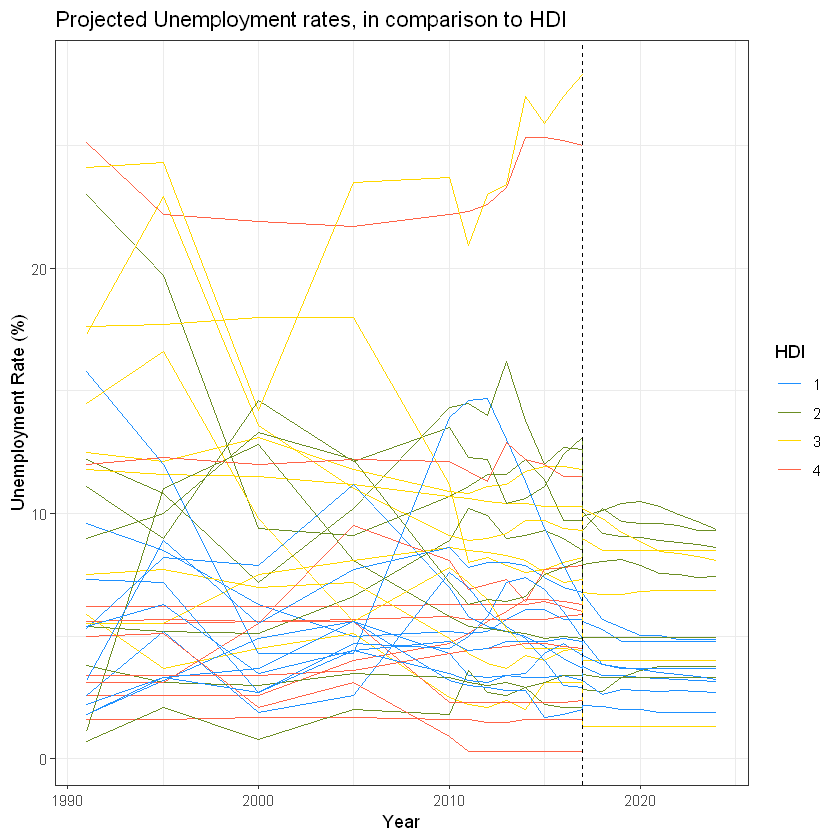

In [72]:
# Plot the unemployment in comparison to HDI
ggplot() +
    geom_line(data = unemployment3, aes(x=Year, y=Unemployment_Rate, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors
    # Add labels
    ggtitle('Projected Unemployment rates, in comparison to HDI') + xlab('Year') + ylab('Unemployment Rate (%)') +
    geom_vline(xintercept = 2017, linetype='dashed') # Add line to indicate where WEO predictions begin

Read in information on income inequality, Gini Coefficient

Source: http://hdr.undp.org/en/indicators/67106

In [73]:
# Read information from csv file using read_csv
income_inequality <- read_csv("Income_Inequality.csv")
# glimpse(income_inequality)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `2010-2017` = col_double()
)


Using Country, Group as id variables


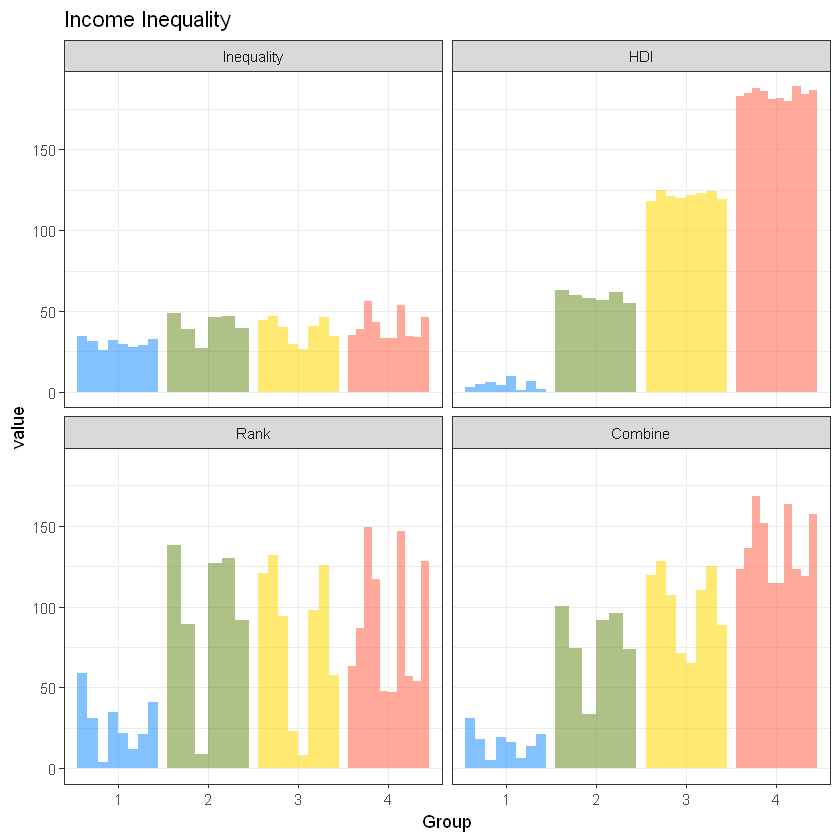

In [74]:
# Rename column 3
names(income_inequality)[3] <- 'Inequality'

# Sort by Inequality and omit empty columns
income_inequality <- income_inequality %>%
    arrange(Inequality) %>%
    na.omit() 

# Rank by income inequality, find average of income inequality and HDI 
income_inequality$Rank <- 1:nrow(income_inequality)
income_inequality$Combine <- ((income_inequality$HDI+income_inequality$Rank)/2)

# Find data for each HDI group and group by variables
income_inequality_highest <- subset(income_inequality, HDI %in% highest) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="1")

income_inequality_high <- subset(income_inequality, HDI %in% high) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="2")

income_inequality_low <- subset(income_inequality, HDI %in% low) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="3")

income_inequality_lowest <- subset(income_inequality, HDI %in% lowest) %>% 
    group_by(Country, Inequality, HDI, Rank, Combine) %>% summarize(Group="4")

# Bind dataframes together
income_inequality2 <- rbind(income_inequality_highest, income_inequality_high, income_inequality_low, income_inequality_lowest)

# Make four bar plots (using facet_wrap) 
ggplot() + 
    geom_bar(data = melt(income_inequality2), aes(x = Group, y = value, group=Country, fill=Group, alpha = 0.9), stat='identity',  position="dodge") +
    scale_fill_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colors
    ggtitle('Income Inequality') + theme(legend.position = ("none")) +
    facet_wrap(~ variable)

Read in information on male labour force participation rate

Source: http://hdr.undp.org/en/indicators/48806

In [75]:
# Read information from csv file using read_csv
male_employment <- read_csv("Male_Employment.csv")
# glimpse(male_employment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


In [76]:
# Filter out empty columns, sort by HDI rank 
male_employment <- male_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
male_employment_highest <- subset(male_employment, HDI %in% highest)
male_employment_highest$HDI <- '1'

male_employment_high <- subset(male_employment, HDI %in% high)
male_employment_high$HDI <- '2'

male_employment_low <- subset(male_employment, HDI %in% low)
male_employment_low$HDI <- '3'

male_employment_lowest <- subset(male_employment, HDI %in% lowest)
male_employment_lowest$HDI <- '4'

# Bind dataframes for each HDI group into one data frame
male_employment2 <- rbind(male_employment_highest, male_employment_high, male_employment_low, male_employment_lowest) 

# Convert to long dataframe
male_employment2 <- convert_to_long(male_employment2) %>% rename(Male_Employment=Factor)

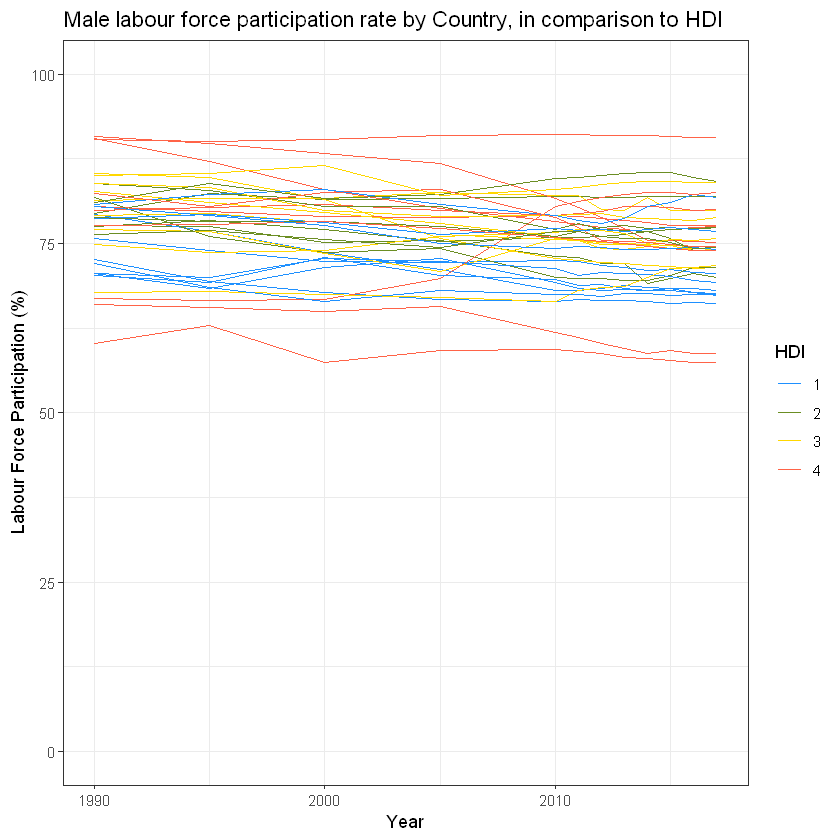

In [77]:
# Plot the male labour force participation rates in comparison to HDI
ggplot() +
    geom_line(data = male_employment2, aes(x=Year, y=Male_Employment, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Pick colours manually
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + 
    xlab('Year') + ylab('Labour Force Participation (%)') + ylim(0,100) # Labels

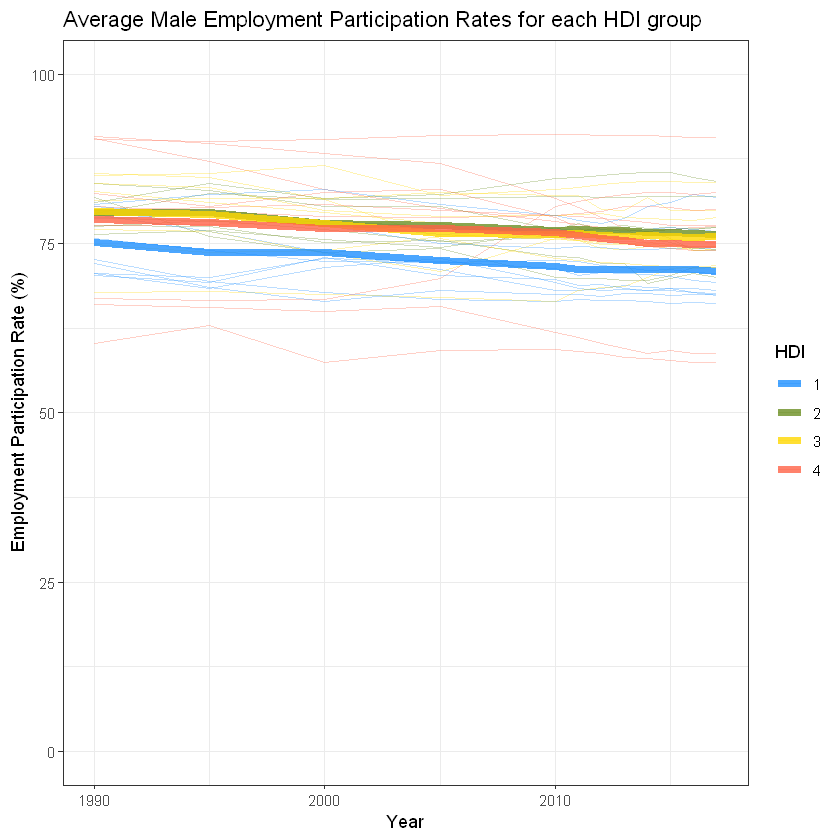

In [78]:
# Group the long dataframe by HDI and Year so we can find the average participation rate for each group
malegrouped <- male_employment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Male_Employment = mean(Male_Employment)) # Find the average participation rate

ggplot(male_employment2, aes(x = Year, y = Male_Employment, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot the lines for each country
    geom_line(data = malegrouped, alpha = .8, size = 2) + # Plot bold lines for averages
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually choose colours
    theme_bw() + ggtitle('Average Male Employment Participation Rates for each HDI group') + 
    xlab('Year') + ylab('Employment Participation Rate (%)') + ylim(0,100) # Labels

Read in information on female labour force participation rate

Source: http://hdr.undp.org/en/indicators/48706

In [79]:
# Read information from csv file using read_csv
female_employment <- read_csv("Female_Employment.csv")
# glimpse(female_employment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


In [80]:
# Filter out empty columns, sort by HDI rank 
female_employment <- female_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
female_employment_highest <- subset(female_employment, HDI %in% highest)
female_employment_highest$HDI <- '1'

female_employment_high <- subset(female_employment, HDI %in% high)
female_employment_high$HDI <- '2'

female_employment_low <- subset(female_employment, HDI %in% low)
female_employment_low$HDI <- '3'

female_employment_lowest <- subset(female_employment, HDI %in% lowest)
female_employment_lowest$HDI <- '4'

# Bind dataframes for each HDI group into one data frame
female_employment2 <- rbind(female_employment_highest, female_employment_high, female_employment_low, female_employment_lowest) 

# Convert to long dataframe
female_employment2 <- convert_to_long(female_employment2) %>% rename(Female_Employment=Factor)

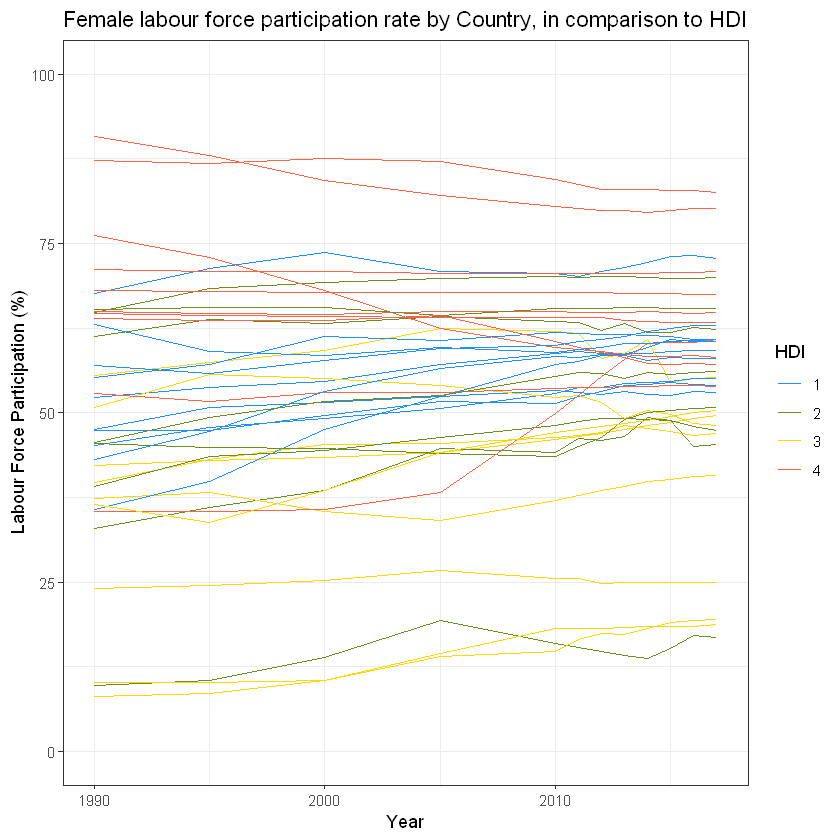

In [81]:
# Plot the male labour force participation rates in comparison to HDI
ggplot() +
    geom_line(data = female_employment2, aes(x=Year, y=Female_Employment, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colours
    ggtitle('Female labour force participation rate by Country, in comparison to HDI') + 
    xlab('Year') + ylab('Labour Force Participation (%)') + ylim(0,100) # Labels

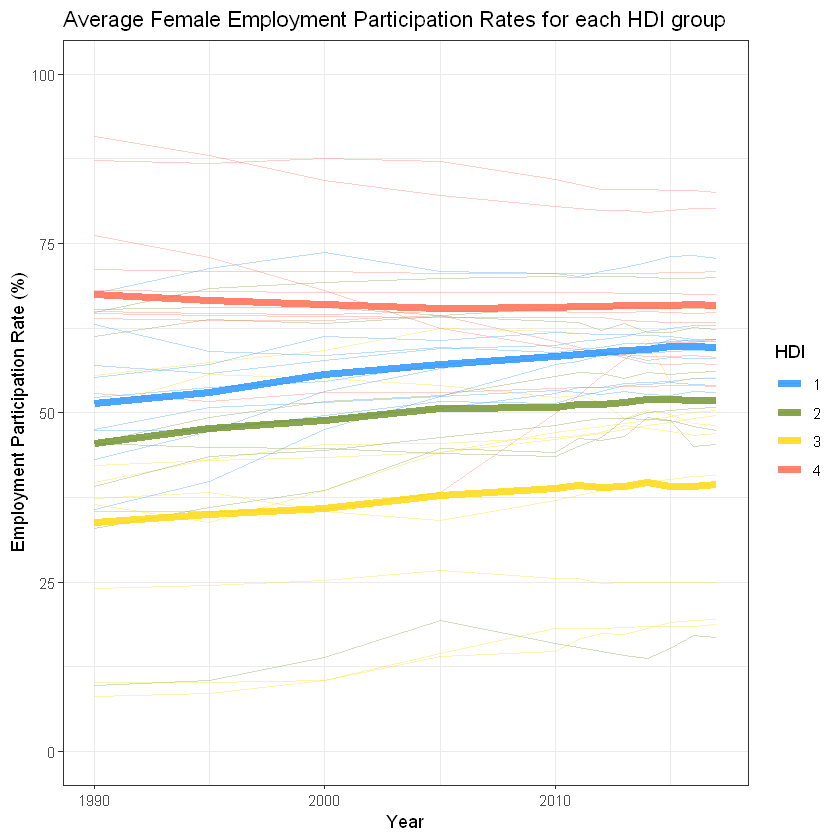

In [82]:
# Group the long dataframe by HDI and Year so we can find the average participation rate for each group
femalegrouped <- female_employment2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Female_Employment = mean(Female_Employment)) # Find the average participation rate

ggplot(female_employment2, aes(x = Year, y = Female_Employment, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot the lines for each country
    geom_line(data = femalegrouped, alpha = .8, size = 2) + # Plot bold line for averages
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Average Female Employment Participation Rates for each HDI group') + 
    xlab('Year') + ylab('Employment Participation Rate (%)') + ylim(0,100) # Labels

In [83]:
# Economic Factors Dataframe
economic_factors <- merge(income_index2,unemployment2,by=c("HDI","Country","Year")) %>%
                    merge(female_employment2,by=c("HDI","Country","Year")) %>%
                    merge(male_employment2,by=c("HDI","Country","Year"))

head(economic_factors)
head(income_inequality2)

HDI,Country,Year,Income_Index,Unemployment_Rate,Female_Employment,Male_Employment
1,Australia,1995,0.859,8.5,53.7,74.0
1,Australia,2000,0.883,6.3,54.6,72.3
1,Australia,2005,0.896,5.0,57.1,72.2
1,Australia,2010,0.905,5.2,58.7,72.5
1,Australia,2011,0.906,5.1,59.0,72.3
1,Australia,2012,0.911,5.2,58.8,71.8


Country,Inequality,HDI,Rank,Combine,Group
Australia,34.7,3,59,31.0,1
Germany,31.7,5,31,18.0,1
Iceland,25.6,6,4,5.0,1
Ireland,31.9,4,35,19.5,1
Netherlands,29.3,10,22,16.0,1
Norway,27.5,1,12,6.5,1


# Social Factors

Read in information on Homicide Rates

Source: http://hdr.undp.org/en/indicators/61006

In [84]:
read <- "Homicide_rate.csv" %>% # Create a variable to store Homicide rate csv file. 
            read_csv(    # Use read_csv function to read Homicide rate file to dataframe
            col_types = cols(
            .default = col_character()
            ))

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20]"

In [85]:
homi_rate_df <- read %>% # Create a new variable to store the filter dataframe from original dataframe("read") 
    select(-starts_with("X")) %>% # Remove all the empty columns start with "X" letter
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>% # Create a new column that stores a HDI rank and converts the type of column into numeric
    arrange(HDI) %>% # Sort the HDI column as ascent order
    na.omit() # Remove all the 'NA' values in the dataframe

# Create dataframe for eachs set of HDI indexes
homi_rate_highest <- subset(homi_rate_df, HDI %in% highest)
homi_rate_highest$HDI <- '1'

homi_rate_high <- subset(homi_rate_df, HDI %in% high)
homi_rate_high$HDI <- '2'

homi_rate_low <- subset(homi_rate_df, HDI %in% low)
homi_rate_low$HDI <- '3'

homi_rate_lowest <- subset(homi_rate_df, HDI %in% lowest)
homi_rate_lowest$HDI <- '4'

# Bind data into new dataframe
homi_rate <- rbind(homi_rate_highest, homi_rate_high, homi_rate_low, homi_rate_lowest) 

# Convert to long dataframe
homi_rate <- convert_to_long(homi_rate) %>% rename(Homicide_Rate=Factor)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

In [86]:
get_avr_homi_rate <- function(input) # Create a function that filter the dataframe and get the average homicide rate in each group
{
    filter_homi_rate_df <- homi_rate_df %>%  # Create a new dataframe that stores only a group of HDI countries in 2000, 2010 and 2015
        subset(HDI %in% input) %>% # Check whether a country in that group of HDI countries
        select('HDI Rank (2017)',Country ,'2000', '2010', '2015')  # Filter the columns that we want to collect. We want to colect only HDI rank, country name, 2000, 2010 and 2015
    names(filter_homi_rate_df)[names(filter_homi_rate_df) == '2000'] <- 'y_2000' # Change the name of the year to make it's easy to transform 
    names(filter_homi_rate_df)[names(filter_homi_rate_df) == '2010'] <- 'y_2010'
    names(filter_homi_rate_df)[names(filter_homi_rate_df) == '2015'] <- 'y_2015'
    
    filter_homi_rate_df <- filter_homi_rate_df %>% # Transform the year columns in 'filter_homi_rate_df' dataframe from character to numeric and remove the warning of missing data message
        transform(y_2000 = suppressWarnings(as.numeric(y_2000)), y_2010 = suppressWarnings(as.numeric(y_2010)), y_2015 = suppressWarnings(as.numeric(y_2015)))
    
    result <- filter_homi_rate_df %>% # Create a new variable stores the output of the function
            na.omit() %>%  # Remove all the 'NA' values in the dataframe
            summarise('2000' = mean(y_2000), '2010' = mean(y_2010),'2015' = mean(y_2015)) %>% # Calculate the average homicide rate of the group in 2000, 2010, 2015
            gather(key=Year, value=Factor) %>% # Convert the dataframe from wide to long format 
            transform(Year=as.numeric(Year))
   return(result) # return a dataframe that stores the average homicide rate of the group
}

In [87]:
aver_le_highest <- get_avr_homi_rate(highest) # Get the average homicide rate of highest HDI countries
aver_le_highest$HDI <- '1'

aver_le_high <- get_avr_homi_rate(high) # Get the average homicide rate of high HDI countries
aver_le_high$HDI <- '2'

aver_le_low <- get_avr_homi_rate(low) # Get the average homicide rate of low HDI countries
aver_le_low$HDI <- '3'

aver_le_lowest <- get_avr_homi_rate(lowest) # Get the average homicide rate of lowest HDI countries
aver_le_lowest$HDI <- '4'

# Bind data into new dataframe
average = rbind(aver_le_highest, aver_le_high, aver_le_low, aver_le_lowest)  %>% rename(Homicide_Rate=Factor)

Warning message:
"Removed 9 rows containing missing values (geom_path)."

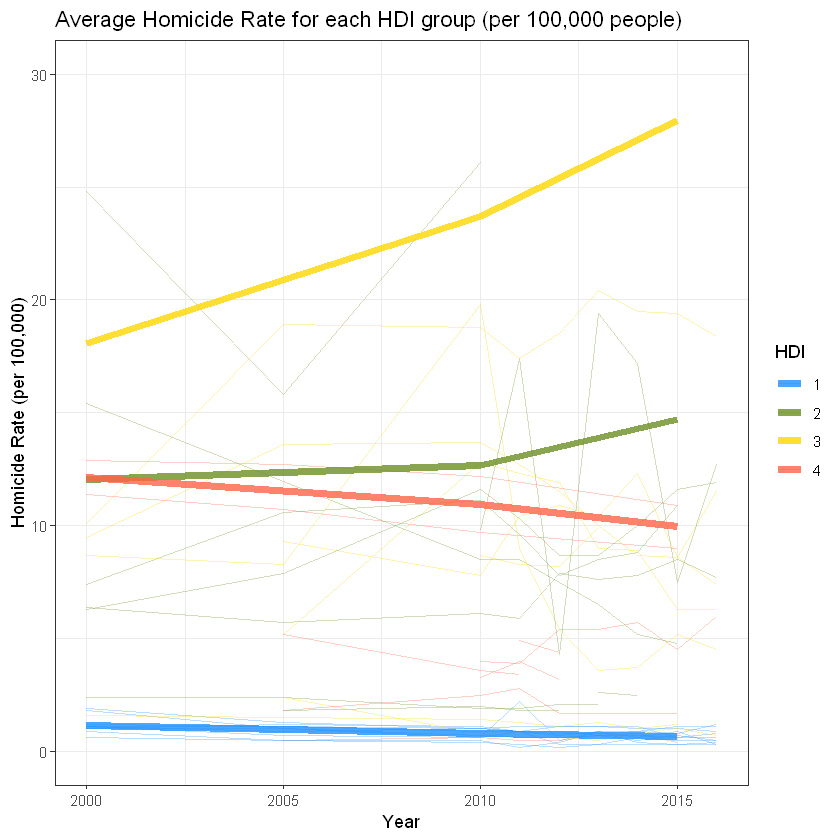

In [88]:
ggplot(homi_rate, aes(x = Year, y = Homicide_Rate, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot the lines for each country
    geom_line(data = average, alpha = .8, size = 2) + # Plot bold lines for averages
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually choose colours
    theme_bw() + ggtitle('Average Homicide Rate for each HDI group (per 100,000 people)') + 
    xlab('Year') + ylab('Homicide Rate (per 100,000)') + ylim(0,30)  # Labels

Read in csv files to get information on suicide rates 

Source: http://hdr.undp.org/en/indicators/112606 (female)
Source: http://hdr.undp.org/en/indicators/112506 (male)

In [89]:
# To get csv files
female_suicide_rate <- "Suicide_Rate_Female.csv" # suicide rate in female csv file
male_suicide_rate <- "Suicide_Rate_Male.csv" # suicide rate in male csv file
human_development_index <- "HDI.csv" # human development index csv file

# To read csv files
female_suicide_df <- female_suicide_rate %>% read_csv() 
male_suicide_df <- male_suicide_rate %>% read_csv()
read_HDI <- human_development_index %>% read_csv()

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10]"Parsed with column specification:
cols(
  `HDI Rank (2017)` = col_double(),
  Country = col_character(),
  `2000` = col_double(),
  X4 = col_character(),
  `2005` = col_double(),
  X6 = col_character(),
  `2010` = col_double(),
  X8 = col_character(),
  `2015` = col_double(),
  X10 = col_character()
)
Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10]"Parsed with column specification:
cols(
  `HDI Rank` = col_double(),
  Country = col_character(),
  `2000` = col_double(),
  X4 = col_character(),
  `2005` = col_double(),
  X6 = col_character(),
  `2010` = col_double(),
  X8 = col_character(),
  `2015` = col_double(),
  X10 = col_character()
)
Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26], 'X28' [28], 'X30' [30], 'X32' [

In [90]:
# Create vectors for the HDI indexes used in each group (not use)
group1 <- c(1:20) # Most developed countries (1-10)
group2 <- c(50:69) # 66 Percentile (53-63)
group3 <- c(109:128) # 33 Percentile (116-126)
group4 <-c(162:181) # Least developted countries (179-189)

In [91]:
# Tidy up tables 

# For female table
updated_female_df <- female_suicide_df %>% 
    select(-starts_with("X")) %>% # remove the un-wanted columns (X + number)
    rename(HDI = `HDI Rank (2017)`) # rename HDI

# For male table
updated_male_df <- male_suicide_df %>% # for male table
    select(-starts_with("X")) %>% # remove the un-wanted columns (X + number)
     rename(HDI = `HDI Rank`) # rename HDI

fix_invalid_locale <- Sys.setlocale('LC_ALL','C') # to fix the invalid locale in gsub

# For Human Development Index
read_HDI <- read_HDI %>% select(-starts_with("X")) %>% arrange(`HDI Rank`) # omit un-wanted/irrelevant columns which contains redundant values in df

# For Income Index
income_index <- income_index %>% arrange(HDI) %>% # Sort df by HDI rank
                                 na.omit()             # omit rows containing NA value to reduce error calculation in the total of Income Index over year

In [92]:
# To convert the long table to wide table
convert_to_wide <- function(df)
    spread(df, key = Year, value = Factor)

# To calculate the total suicide rate in male and female
combined_suicide_rate_df <- merge(x=updated_female_df, y=updated_male_df %>% select(-HDI), by="Country", all.x=TRUE) # merge suicide in female and male tables together by Country (and by left-join)
rates <- combined_suicide_rate_df %>% select(-Country) %>% select(-HDI) # only get the values from 2000 to 2015 in the suicide rate in female and male combined table above
combined_suicide_rate_df <- combined_suicide_rate_df %>% mutate(total_rate=rowSums(rates)) %>% arrange(HDI) # sum up the values above to get the total rate of suicide in both genders
combined_suicide_rate_df <- combined_suicide_rate_df %>% mutate(num=1:nrow(combined_suicide_rate_df)) # add column "num" for the after use (to sort countries in 4 selected group of HDI from lowest to highest)

HDI_highest <- combined_suicide_rate_df %>% subset(num %in% group1) # to get the highest HDI suicide rate by using "num" to sort countries matching with top-20 countries with highest HDI
HDI_high <- combined_suicide_rate_df %>% subset(num %in% group2)  # to get the high HDI suicide rate by using "num" to sort countries matching with next 20 countries with high HDI
HDI_low <- combined_suicide_rate_df %>% subset(num %in% group3)  # to get the low HDI suicide rate by using "num" to sort countries matching with next 20 countries with low HDI
HDI_lowest <- combined_suicide_rate_df %>% subset(num %in% group4)  # to get the lowest HDI suicide rate by using "num" to sort countries matching with next 20 countries with lowest HDI

Category,Suicide Rate,HDI
1,1882.5,HDI Rank 1-22
2,1567.9,HDI Rank 53-74
3,1863.4,HDI Rank 116-136
4,2210.9,HDI Rank 170-189


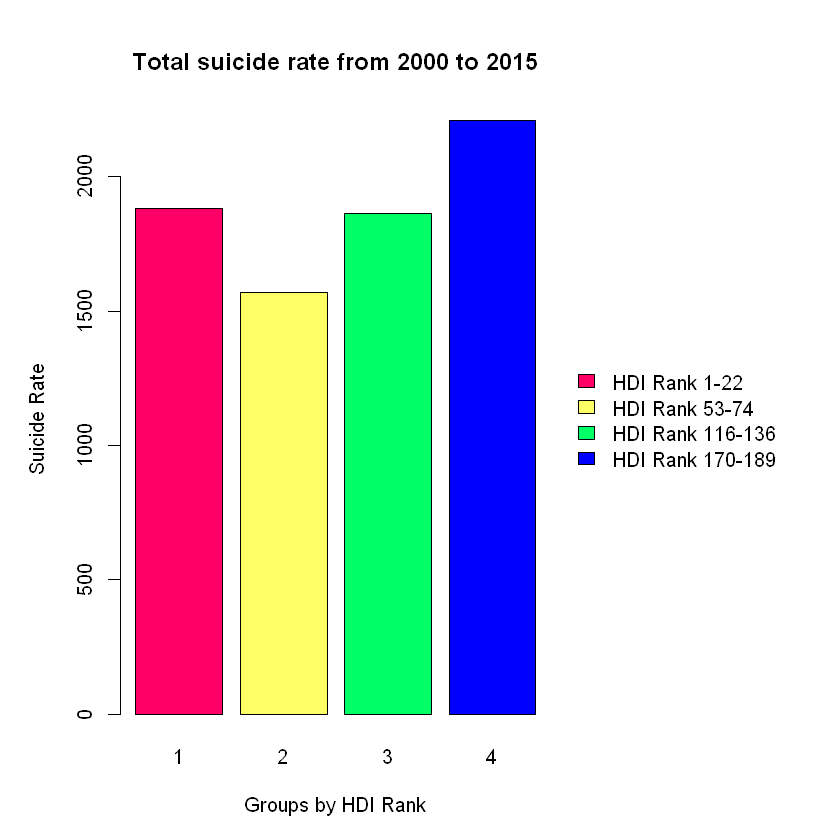

In [93]:
total_group1 <- sum(HDI_highest[,'total_rate'], na.rm = TRUE) # sum up the total rates of the highest HDI tier
total_group2 <- sum(HDI_high[,'total_rate'], na.rm = TRUE) # sum up the total rates of the high HDI tier
total_group3 <- sum(HDI_low[,'total_rate'], na.rm = TRUE) # sum up the total rates of the low HDI tier
total_group4 <- sum(HDI_lowest[,'total_rate'], na.rm = TRUE) # sum up the total rates of the lowest HDI tier

female_male_suicide_rate_df <- data.frame(total_group1, total_group2, total_group3, total_group4) # create a df include the figures above to make a plot 
female_male_suicide_rate_df1 <- female_male_suicide_rate_df %>% gather(key = Category, value = `Suicide Rate`, na.rm = TRUE) %>% # switch the df to the long form using gather with key:category and value:rate and remove NA
                                mutate(HDI = c("HDI Rank 1-22", "HDI Rank 53-74", "HDI Rank 116-136", "HDI Rank 170-189"))

female_male_suicide_rate_df1["1", "Category"] <- 1 # rename first value in column Category to group1
female_male_suicide_rate_df1["2", "Category"] <- 2 # rename second value in column Category to group2
female_male_suicide_rate_df1["3", "Category"] <- 3 # rename third value in column Category to group3
female_male_suicide_rate_df1["4", "Category"] <- 4 # rename last value in column Category to group4

female_male_suicide_rate_df1

color <- c(rgb(1,0,0.4,1), rgb(1,1,0.4,1), rgb(0,1,0.4,1), rgb(0,0,1,1)) # set up the colors in each bar -- red, yellow, green and blue
# Plot

par(mar = c(5, 5, 5, 12), xpd = TRUE) # to set the bottom (5), left (5), top (5) and right (12) margins respectively of the plot region in number of lines of text.
barplot(height=female_male_suicide_rate_df1$`Suicide Rate`, names=female_male_suicide_rate_df1$Category, # x-axis: groups, y-axis: suicide rate 
        ylab="Suicide Rate", xlab="Groups by HDI Rank", main="Total suicide rate from 2000 to 2015",     # set name for axis-es and title of the table 
        col=color, legend.text = female_male_suicide_rate_df1$HDI, args.legend = list(x ='right', bty='n', inset=c(-0.6,0))) # fill color, set name for the legend according to the color and change the size and location of the legend

In [94]:
# calculate the avg of suicide rate in male and female
avg_group1 <- (HDI_highest[,'total_rate'] / 4) %>% round(digits=2) # sum up the total rates of the highest HDI tier
avg_group2 <- (HDI_high[,'total_rate'] / 4) %>% round(digits=2) # sum up the total rates of the high HDI tier
avg_group3 <- (HDI_low[,'total_rate'] / 4) %>% round(digits=2) # sum up the total rates of the low HDI tier
avg_group4 <- (HDI_lowest[,'total_rate'] / 4) %>% round(digits=2) # sum up the total rates of the lowest HDI tier

In [95]:
# Choose only corresponding years 2000, 2005, 2010, 2015 in **HDI** data in order to merge with the suicide rate and Income Index (including HDI Rank and Country for identities when joining tables)
HDI_df <- read_HDI %>% select(`HDI Rank`, `Country`, `2000`, `2005`, `2010`, `2015`)

In [96]:
# Convert type chr to double for later sum up 
HDI_df$`2000` <- as.numeric(HDI_df$`2000`) 
HDI_df$`2005` <- as.numeric(HDI_df$`2005`) 
HDI_df$`2010` <- as.numeric(HDI_df$`2010`)
HDI_df$`2015` <- as.numeric(HDI_df$`2015`) 
# get warning because HDI_df contains NA 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [97]:
# WORK WITH TOTAL OF SUICIDE RATE
total_suicide_rate_df <- combined_suicide_rate_df %>% select(-starts_with("2")) %>% # del un-wanted columns 
                                                      select(-num) # del un-wanted columns

# Total suicide rate by selected countries
total_suicide_rate_by_selected_countries <- rbind(HDI_highest, HDI_high, HDI_low, HDI_lowest) %>% select(-starts_with("2")) # combines all HDI groups together and del unwanted columns

# Average total suicide rate by selected countries
avg_rate <- (total_suicide_rate_by_selected_countries$total_rate / 4) %>% round(digits=2) # get the average of suicide rates in each country and round them with 2 decimals
avg_suicide_rate_df <- total_suicide_rate_by_selected_countries %>% mutate(average_suicide_rate=avg_rate) %>% select(-total_rate) # add all figures above into a df and del an unwanted column which is the "total rate"

In [98]:
# WORK WITH HDI
HDI_df <- HDI_df %>% na.omit() %>% arrange(`HDI Rank`) # fixed the warning above by omitting NA, arrange the df by "HDI Rank"
total_HDI <- HDI_df %>% select(3:6) # to get only values from 2000 to 2015 columns
avg_HDI_df <- HDI_df %>% mutate(average_HDI=(rowSums(total_HDI) / 4) %>% round(digits=2)) # get a new column which is the average of HDI in each country and round them with 2 decimals in HDI_df
new_avg_HDI_df <- avg_HDI_df %>% select(-starts_with("2")) # del some unwanted columns (all values used to calculate the average HDI)

In [99]:
# Choose only corresponding years 2000, 2005, 2010, 2015 in **Income Index** data to merge with the suicide rate and HDI (including HDI Rank and Country for identities when joining tables)
income_df <- income_index %>% select(`HDI`, `Country`, `2000`, `2005`, `2010`, `2015`) 

In [100]:
#WORK WITH INCOME INDEX
income_df <- income_df %>% na.omit() %>% arrange(HDI) # tidy the income df up by omitting NA and sorting the table by HDI ascending 
total_income <- income_df %>% select(3:6) # to get only values from 2000 to 2015 columns
avg_income_df <- income_df %>% mutate(average_income=(rowSums(total_income) / 4) %>% round(digits=2)) # get a new column which is the average of income in each country and round them with 2 decimals in income_df
new_avg_income_df <- avg_income_df %>% select(-starts_with("2")) # del some unwanted columns (all values used to calculate the average income)
head(avg_income_df)

HDI,Country,2000,2005,2010,2015,average_income
1,Norway,0.959,0.975,0.973,0.983,0.97
2,Switzerland,0.950,0.959,0.964,0.962,0.96
3,Australia,0.883,0.896,0.905,0.916,0.90
4,Ireland,0.880,0.907,0.894,0.934,0.90
5,Germany,0.891,0.898,0.910,0.922,0.91
6,Iceland,0.875,0.896,0.874,0.914,0.89


In [101]:
#MERGE STUFF
merge_suicide_HDI_df <- merge(x=avg_suicide_rate_df, y=new_avg_HDI_df %>% select(-`HDI Rank`), by="Country", all.x=TRUE) # merge the tables of average suicide rate and HDI by left-join
merge_suicide_HDI_income_df <- merge(x=merge_suicide_HDI_df, y=new_avg_income_df  %>% select(-`HDI`), by="Country", all.x=TRUE) %>% na.omit() %>% arrange(HDI) # merge the tables of the merged table above with average income by left-join

# Values include NA
merge_suicide_HDI_income_df %>% filter(is.na(average_suicide_rate)) # to find which country has NA in average suicide rate df
merge_suicide_HDI_income_df %>% filter(is.na(average_HDI)) # to find which country has NA in average HDI df
merge_suicide_HDI_income_df %>% filter(is.na(average_income)) # to find which country has NA in average income df

Country,HDI,num,average_suicide_rate,average_HDI,average_income


Country,HDI,num,average_suicide_rate,average_HDI,average_income


Country,HDI,num,average_suicide_rate,average_HDI,average_income


In [102]:
# function to collect subset wantted in the table and del column "num"
select_group <- function(df, set)
    subset(df, num %in% set) %>% # Select the countries from the dataset with the given indexes
    select(-(num)) # Remove HDI columns 

suicide_HDI_income_group1 <- select_group(merge_suicide_HDI_income_df, group1)  # to get group1 (sorting by HDI) countries from the merged table above
suicide_HDI_income_group2 <- select_group(merge_suicide_HDI_income_df, group2) # to get group2 (sorting by HDI) countries from the merged table above
suicide_HDI_income_group3 <- select_group(merge_suicide_HDI_income_df, group3) # to get group3 (sorting by HDI) countries from the merged table above
suicide_HDI_income_group4 <- select_group(merge_suicide_HDI_income_df, group4) # to get group4 (sorting by HDI) countries from the merged table above

In [103]:
# Make dataframes for each HDI group
HDI_highest <- suicide_HDI_income_group1 %>% 
    group_by(Country, average_suicide_rate, average_HDI, average_income) %>% summarize(Income_lv="highest income") # to group group1 Country, average suicide rate, average HDI and income together and summarize those as countries which have highest income
HDI_high <- suicide_HDI_income_group2 %>% 
    group_by(Country, average_suicide_rate, average_HDI, average_income) %>% summarize(Income_lv="high income")  # to group group2 Country, average suicide rate, average HDI and income together and summarize those as countries which have high income
HDI_low <- suicide_HDI_income_group3 %>% 
    group_by(Country, average_suicide_rate, average_HDI, average_income) %>% summarize(Income_lv="low income")  # to group group3 Country, average suicide rate, average HDI and income together and summarize those as countries which have low income
HDI_lowest <- suicide_HDI_income_group4 %>% 
    group_by(Country, average_suicide_rate, average_HDI, average_income) %>% summarize(Income_lv="lowest income")  # to group group4 Country, average suicide rate, average HDI and income together and summarize those as countries which have lowest income

Suicide_Income_df <- rbind(HDI_highest, HDI_high, HDI_low, HDI_lowest) # combine all HDI groups together using rbind (row binding)
head(Suicide_Income_df) 

Country,average_suicide_rate,average_HDI,average_income,Income_lv
Australia,22.38,0.92,0.90,highest income
Austria,27.18,0.87,0.91,highest income
Belgium,34.38,0.89,0.91,highest income
Canada,21.85,0.90,0.90,highest income
Denmark,20.75,0.90,0.92,highest income
Finland,34.92,0.89,0.90,highest income


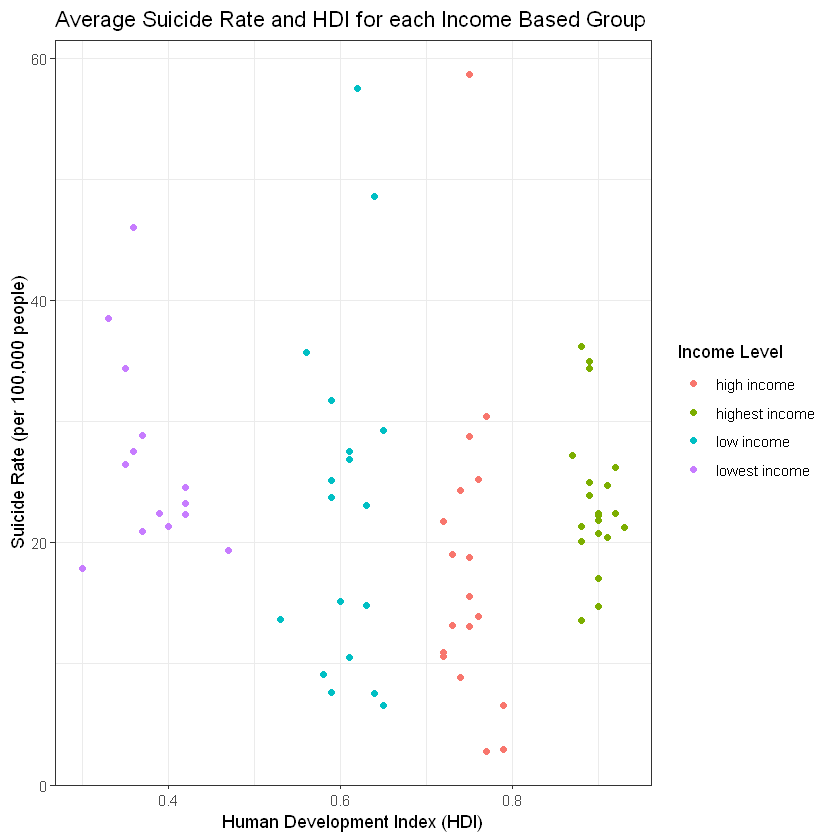

In [104]:
# A basic scatterplot with color depending on Income Level
ggplot(Suicide_Income_df, aes(x=average_HDI, y=average_suicide_rate, color=Income_lv)) +  # x-axis: the average of HDI, y-axis: the average of suicide rate in 20 countries, filled colors by Income Level
    geom_point() + xlab("Human Development Index (HDI)") + ylab("Suicide Rate (per 100,000 people)") + # set names of axis-es
    labs(color = "Income Level") + ggtitle("Average Suicide Rate and HDI for each Income Based Group") +
    theme_bw()

In [105]:
# Plot suicide rates in female and male over years (in 4 tiers (highest, high, low and lowest HDI))

# For female df
female_suicide <- updated_female_df %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() #Omit missing values

# Create dataframe for each set of HDI indexes
female_suicide_highest <- subset(female_suicide, HDI %in% group1)
female_suicide_highest$HDI <- '1'

female_suicide_high <- subset(female_suicide, HDI %in% group2)
female_suicide_high$HDI <- '2'

female_suicide_low <- subset(female_suicide, HDI %in% group3)
female_suicide_low$HDI <- '3'

female_suicide_lowest <- subset(female_suicide, HDI %in% group4)
female_suicide_lowest$HDI <- '4'

# Bind data into new dataframe
female_suicide2 <- rbind(female_suicide_highest, female_suicide_high, female_suicide_low, female_suicide_lowest) 

# Convert to long dataframe
female_suicide2 <- convert_to_long(female_suicide2) %>% rename(Female_Suicide=Factor)

In [106]:
# For male df
male_suicide <- updated_male_df %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit() #Omit missing values

# Create dataframe for each set of HDI indexes
male_suicide_highest <- subset(male_suicide, HDI %in% group1)
male_suicide_highest$HDI <- '1'

male_suicide_high <- subset(male_suicide, HDI %in% group2)
male_suicide_high$HDI <- '2'

male_suicide_low <- subset(male_suicide, HDI %in% group3)
male_suicide_low$HDI <- '3'

male_suicide_lowest <- subset(male_suicide, HDI %in% group4)
male_suicide_lowest$HDI <- '4'

# Bind data into new dataframe
male_suicide2 <- rbind(male_suicide_highest, male_suicide_high, male_suicide_low, male_suicide_lowest) 

# Convert to long dataframe
male_suicide2 <- convert_to_long(male_suicide2) %>% rename(Male_Suicide=Factor)

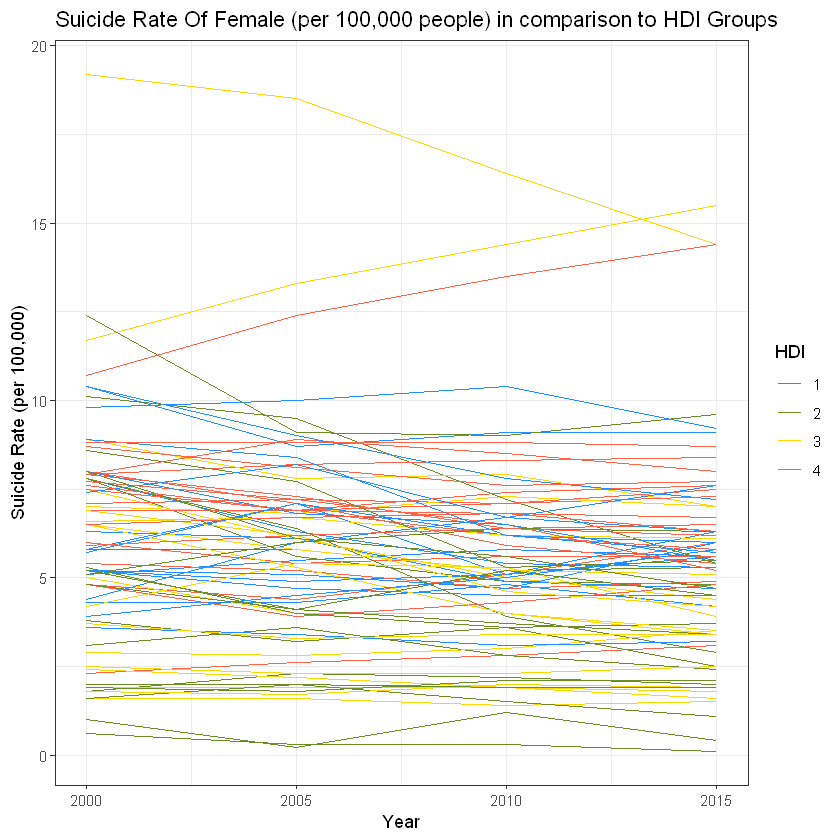

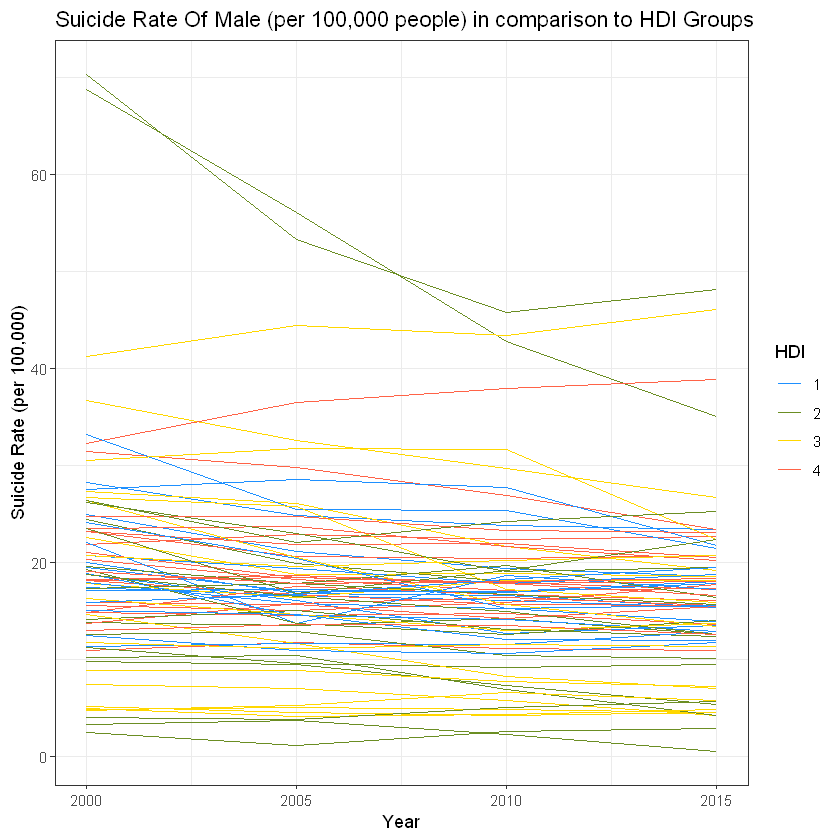

In [107]:
# Plot the female suicide rate
ggplot() +
    geom_line(data = female_suicide2, aes(x=Year, y=Female_Suicide, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colours
    ggtitle('Suicide Rate Of Female (per 100,000 people) in comparison to HDI Groups') + 
    xlab('Year') + ylab('Suicide Rate (per 100,000)')  # Labels

# Plot the male suicide rate
ggplot() +
    geom_line(data = male_suicide2, aes(x=Year, y=Male_Suicide, group=Country, color=HDI)) +
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + theme_bw() + # Manually pick colours
    ggtitle('Suicide Rate Of Male (per 100,000 people) in comparison to HDI Groups') + 
    xlab('Year') + ylab('Suicide Rate (per 100,000)')  # Labels

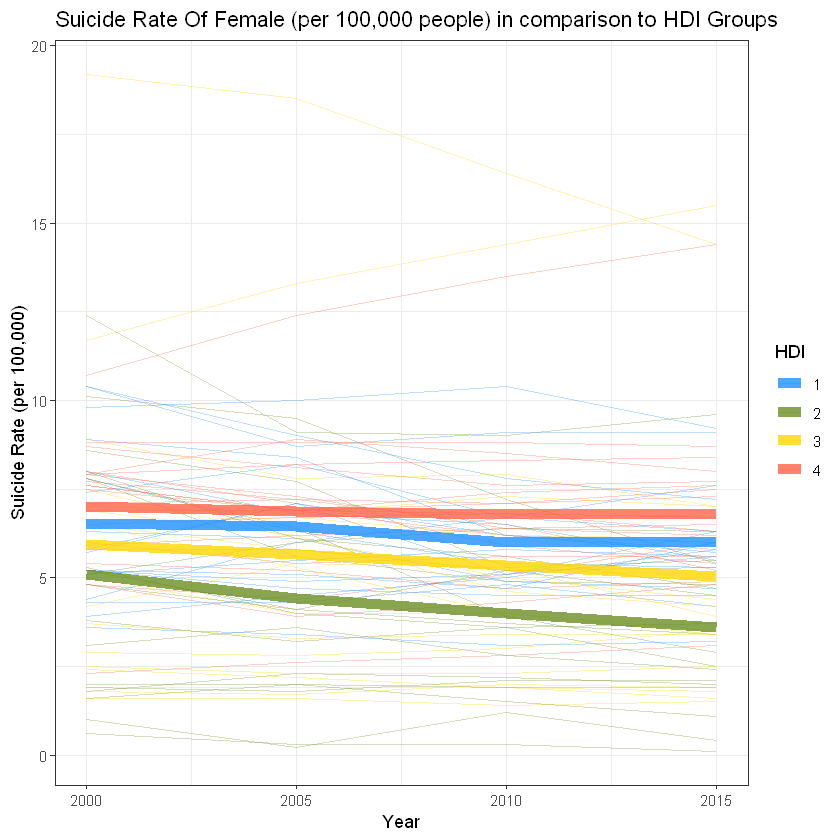

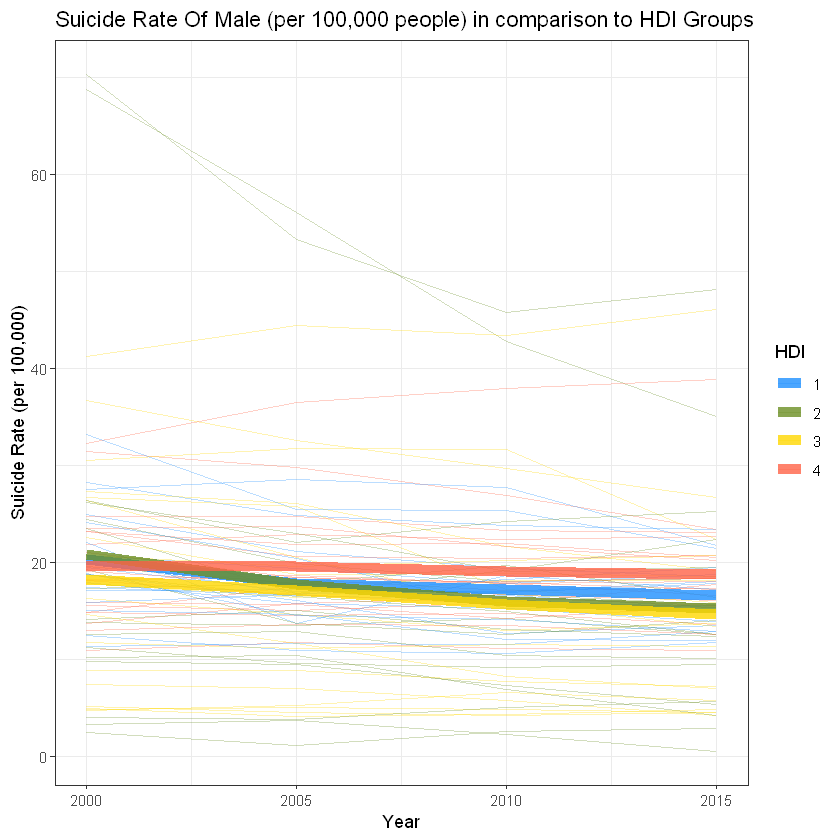

In [108]:
femalegrouped2 <- female_suicide2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Female_Suicide = mean(Female_Suicide)) # Find the average suicide rate

malegrouped2 <- male_suicide2 %>% 
        group_by(HDI, Year) %>% 
        summarise(Male_Suicide = mean(Male_Suicide)) # Find the average suicide rate

# Plot the average female suicide rate
ggplot(female_suicide2, aes(x = Year, y = Female_Suicide, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = femalegrouped2, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Suicide Rate Of Female (per 100,000 people) in comparison to HDI Groups') + 
    xlab('Year') + ylab('Suicide Rate (per 100,000)') # Labels

# Plot the average male suicide rate
ggplot(male_suicide2, aes(x = Year, y = Male_Suicide, color = HDI)) +
    geom_line(aes(group = Country), alpha = .3) + # Plot lines for each country
    geom_line(data = malegrouped2, alpha = .8, size = 3) + # Plot bold line for average
    scale_color_manual(values = c('dodgerblue', 'olivedrab', 'gold', 'tomato')) + # Manually pick colors
    theme_bw() + ggtitle('Suicide Rate Of Male (per 100,000 people) in comparison to HDI Groups') + 
    xlab('Year') + ylab('Suicide Rate (per 100,000)') # Labels